In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe


#### 1. Read Dataset

In [2]:
df = pd.read_csv(r"Visadataset.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


#### Check Dataset Info & Check Nan values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### Remove Duplicate

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(25480, 12)

#### Drop the Case_id 

In [6]:
df.drop(columns=['case_id'],inplace=True)

In [7]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [8]:
from datetime import date
present_year = date.today().year

In [9]:
df['Company_Age'] = present_year-df['yr_of_estab']

In [10]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,Company_Age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


#### remove yr_of_estab column

In [11]:

df.drop(columns=['yr_of_estab'],inplace=True)

In [12]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,Company_Age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,19


#### Type of features

In [13]:
Categorical_features = df.select_dtypes(include='O').columns.to_list()
Numerical_features = df.select_dtypes(exclude='O').columns.to_list()
Discrete_features = [feature for feature in Numerical_features if df[feature].nunique()<25 ]
Continues_features = [feature for feature in Numerical_features if df[feature].nunique()>25 ]

print(f'Categorical_features {Categorical_features}')
print(f'Numerical_features {Numerical_features}')
print(f'Discrete_features {Discrete_features}')
print(f'Continues_features {Continues_features}')

Categorical_features ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']
Numerical_features ['no_of_employees', 'prevailing_wage', 'Company_Age']
Discrete_features []
Continues_features ['no_of_employees', 'prevailing_wage', 'Company_Age']


### Split X & y

In [14]:
X = df.drop(columns=['case_status'])
y = df[['case_status']]

In [15]:
from sklearn.preprocessing import OrdinalEncoder

In [16]:
od_encoder = OrdinalEncoder()

In [17]:
encoded_y = od_encoder.fit_transform(y)
encoded_y

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

#### Work on X
-  need to encode the categorical features.
-  numerical features are skewed so find skewness apply tranformation

In [18]:
categorical_features = X.select_dtypes(include='O').columns.to_list()
print(f'categorical_features : {categorical_features}')


numerical_features = X.select_dtypes(exclude='O').columns.to_list()
print(f'numerical_features : {numerical_features}')

on_encoding_features = []
od_encoding_features = []
for feature in categorical_features:
    if X[feature].nunique()>2:
        od_encoding_features.append(feature)
    else:
        on_encoding_features.append(feature)

print(f'onehot_encoding_features: {on_encoding_features}')
print(f'odinal_encoding_features: {od_encoding_features}')

categorical_features : ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position']
numerical_features : ['no_of_employees', 'prevailing_wage', 'Company_Age']
onehot_encoding_features: ['has_job_experience', 'requires_job_training', 'full_time_position']
odinal_encoding_features: ['continent', 'education_of_employee', 'region_of_employment', 'unit_of_wage']


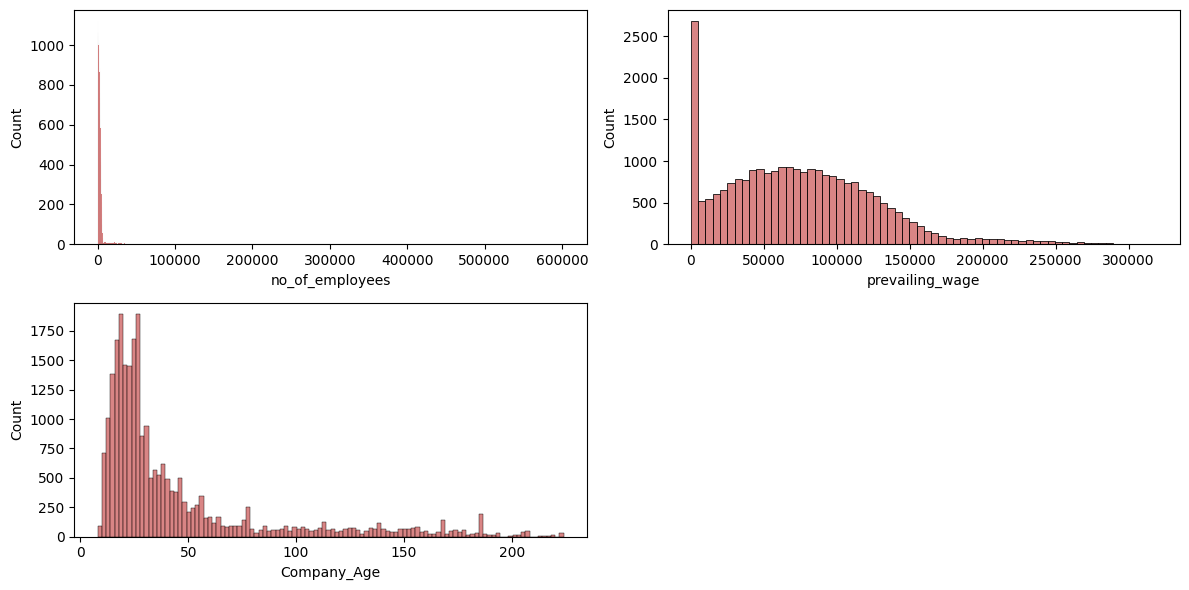

In [19]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [20]:
X[numerical_features].skew(axis=0, skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
Company_Age         2.037301
dtype: float64

In [21]:
from sklearn.preprocessing import PowerTransformer,OneHotEncoder,StandardScaler
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['Company_Age', 'no_of_employees']

In [22]:
X_copy = pt.fit_transform(X[transform_features])

In [23]:
pd.DataFrame(X_copy, columns=transform_features).skew()

Company_Age        0.103264
no_of_employees    0.399339
dtype: float64

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [25]:
tranformation = Pipeline(steps=[
    ('powertranformation',PowerTransformer(method='yeo-johnson'))
])

preprocessing = ColumnTransformer([
    ('onehot_encoding',OneHotEncoder(),on_encoding_features),
    ('ordinal_encoding',OrdinalEncoder(),od_encoding_features),
    ('powertranformation',tranformation,transform_features),
    ('scaling',StandardScaler(),numerical_features)
])

In [26]:
preprocessing_X = preprocessing.fit_transform(X)

In [27]:
from imblearn.combine import SMOTETomek, SMOTEENN

In [36]:
smoten = SMOTEENN()

res_x,res_y = smoten.fit_resample(preprocessing_X,encoded_y)

In [37]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(res_x,res_y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((13715, 15), (3429, 15))

In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [32]:
model_list = {
    'LogisticRegression': LogisticRegression(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'KNeighborsClassifier' :KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'SVC':SVC(),
    'XGBClassifier':XGBClassifier(),
    'CatBoostClassifier':CatBoostClassifier()
}

In [39]:
def model_evalution(y_true,y_pred):
    acc_score = accuracy_score(y_true,y_pred)
    preci_score = precision_score(y_true,y_pred)
    recall_score_ = recall_score(y_true,y_pred)
    f1_score_ = f1_score(y_true,y_pred)
    auc_score = roc_auc_score(y_true,y_pred)
    
    return {'accuracy_score':acc_score,
            'precision_score':preci_score,
            'recall_score':recall_score_,
            'f1_score':f1_score_,
            'roc_auc_scor':auc_score}
    
    

In [40]:
model_evalution_data = {}
for model_ in model_list:
    model = model_list[model_]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    scores = model_evalution(y_test,y_pred)
    scores['training_acc_score'] = model.score(X_train,y_train)
    scores['test_acc_score'] = model.score(X_test,y_test)
    model_evalution_data[model_] = scores
    print(f'{model_} training completed....')
    

LogisticRegression training completed....
AdaBoostClassifier training completed....
RandomForestClassifier training completed....
KNeighborsClassifier training completed....
DecisionTreeClassifier training completed....
SVC training completed....
XGBClassifier training completed....
Learning rate set to 0.031515
0:	learn: 0.6612999	total: 207ms	remaining: 3m 26s
1:	learn: 0.6342107	total: 224ms	remaining: 1m 51s
2:	learn: 0.6084858	total: 239ms	remaining: 1m 19s
3:	learn: 0.5865714	total: 253ms	remaining: 1m 2s
4:	learn: 0.5669018	total: 266ms	remaining: 53s
5:	learn: 0.5475944	total: 280ms	remaining: 46.4s
6:	learn: 0.5312344	total: 294ms	remaining: 41.7s
7:	learn: 0.5149692	total: 310ms	remaining: 38.4s
8:	learn: 0.4994932	total: 324ms	remaining: 35.7s
9:	learn: 0.4850494	total: 336ms	remaining: 33.3s
10:	learn: 0.4726556	total: 348ms	remaining: 31.3s
11:	learn: 0.4621840	total: 361ms	remaining: 29.7s
12:	learn: 0.4518280	total: 374ms	remaining: 28.4s
13:	learn: 0.4434573	total: 390m

In [46]:
models_evalution_dataframe = pd.DataFrame(model_evalution_data).T

In [48]:
models_evalution_dataframe.sort_values(['roc_auc_scor'],ascending=False)

,accuracy_score,precision_score,recall_score,f1_score,roc_auc_scor,training_acc_score,test_acc_score
RandomForestClassifier,0.951298,0.955319,0.955828,0.955573,0.950817,1.000000,0.951298
XGBClassifier,0.936133,0.941020,0.942523,0.941771,0.935455,0.980532,0.936133
KNeighborsClassifier,0.936716,0.932362,0.953699,0.942910,0.934914,0.965731,0.936716
CatBoostClassifier,0.931759,0.943875,0.930814,0.937299,0.931859,0.953044,0.931759
DecisionTreeClassifier,0.921843,0.925965,0.931879,0.928912,0.920778,1.000000,0.921843
AdaBoostClassifier,0.873141,0.885684,0.882384,0.884031,0.872160,0.869705,0.873141
SVC,0.807524,0.829281,0.816924,0.823056,0.806526,0.801167,0.807524
LogisticRegression,0.723243,0.765108,0.714210,0.738783,0.724202,0.723587,0.723243


In [3]:
from dataclasses import dataclass
import os

In [9]:
@dataclass()
class TrainingPipelineConfig:
    pipeline_name: str = 'PIPELINE_NAME'
    artifact_dir: str = os.path.join('ARTIFACT_DIR', 'TIMESTAMP')
    timestamp: str = 'TIMESTAMP'

In [12]:
TrainingPipelineConfig()

training_pipeline_config: TrainingPipelineConfig = TrainingPipelineConfig()

In [13]:
training_pipeline_config

TrainingPipelineConfig(pipeline_name='PIPELINE_NAME', artifact_dir='ARTIFACT_DIR\\TIMESTAMP', timestamp='TIMESTAMP')

In [6]:
class TrainingPipelineConfig:
    def __init__(self) -> None:
        pipeline_name: str = 'PIPELINE_NAME'
        artifact_dir: str = os.path.join('ARTIFACT_DIR', 'TIMESTAMP')
        timestamp: str = 'TIMESTAMP'